<a href="https://colab.research.google.com/github/haanbik19/Data-Analysis-and-Methodology-Critique-COVID-Response-and-the-Economy/blob/main/hyk330_hw2%2Cq3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDS Homework 2 Template
## Spring 2024


In [ ]:
!pip install shap

In [1]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Problem 3

### Part (A)

In [2]:
# Mark the categories of interest
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch the data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Set outcome class names
class_names = ['atheism', 'christian']

In [3]:
# Initialize & fit tf-idf vectorizer
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(newsgroups_train.data)
y_train = newsgroups_train.target
X_test = vectorizer.transform(newsgroups_test.data)
y_test = newsgroups_test.target

https://github.com/scikit-learn/scikit-learn/issues/10113

In [4]:
# Train & fit the classifier
model = SGDClassifier(loss="log_loss")
model.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

### Part (B)

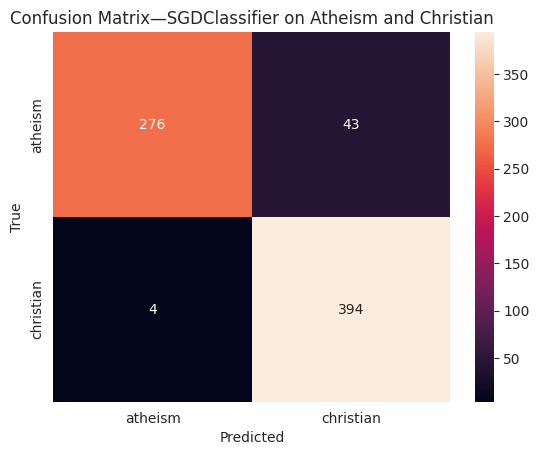

In [5]:
# Confusion
y_pred = model.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix—SGDClassifier on Atheism and Christian')
plt.show()

#### Explainer

Like in the lab, let us hold the "true to model" assumption and only credit features that are actually used in the model rather than correlative features.

In [6]:
# Initialize the explainer and apply to test data
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [7]:
# Select 5 documents in the test set for explanation
import random
# Populate list with document numbers that are misclassified
misclassified_docs=[int(i[0]) for i in np.argwhere(y_test != y_pred)]

# Initialize list that will contain 5 document numbers chosen semi-randomly
expl_docs=[]
expl_docs += random.sample(misclassified_docs,2)
notin_expl_docs=[i for i in range(0,len(y_test)-1) if i not in expl_docs]
expl_docs += random.sample(notin_expl_docs,3)

In [8]:
expl_docs

[610, 271, 535, 88, 62]

In [13]:
# Visually explain 5 documents selected from the test set
shap.initjs()
i=expl_docs[0]
print("Christian" if y_test[i] else "Atheist", "Text")
print(newsgroups_test.data[i])
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test[i,:].toarray()[0],
                    feature_names=vectorizer.get_feature_names_out())

Atheist Text
From: Alan.Olsen@p17.f40.n105.z1.fidonet.org (Alan Olsen)
Subject: Albert Sabin
Lines: 275



BR> From: wpr@atlanta.dg.com (Bill Rawlins)
BR> Newsgroups: alt.atheism
BR> Organization: DGSID, Atlanta, GA

BR>        Since you have referred to the Messiah, I assume you
BR> are referring         to the New Testament.  Please detail
BR> your complaints or e-mail if         you don't want to post.
BR>  First-century Greek is well-known and        
BR> well-understood.  Have you considered Josephus, the Jewish
BR> Historian,         who also wrote of Jesus?  In addition,
BR> the four gospel accounts		 are very much in harmony.

It is also well known that the comments in Josephus relating to Jesus were
inserted (badly) by later editors.  As for the four gospels being in harmony
on the issue of Jesus...  You know not of what you speak.  Here are a few
contradictions starting with the trial and continuing through the assension.

>The death of Judas after the betrayal of Jesus

Acts

In [ ]:
shap.initjs()
i=expl_docs[1]
print("Christian" if y_test[i] else "Atheist", "Text")
print(newsgroups_test.data[i])
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test[i,:].toarray()[0],
                    feature_names=vectorizer.get_feature_names_out())

Christian Text
From: sandvik@newton.apple.com (Kent Sandvik)
Subject: Re: SOC.RELIGION.CHRISTIAN
Organization: Cookamunga Tourist Bureau
Lines: 23

In article <May.16.01.56.14.1993.6674@geneva.rutgers.edu>,
sfp@lemur.cit.cornell.edu (Sheila Patterson) wrote:
> As for the atheists/agnostics who read this list: if you aren't
> christian and if you have no intention of ever becoming one why on
> earth do you waste your time and mine by participating on a christian
> discussion list ?

I don't think we should draw borders around newsgroups, christians
are free to read and post entries on the atheist newsgroups, and 
muslims are free to so so in other groups as well.

It's up to each individual to define their time schedule concerning 
postings. The problems we all have noticed on various newsgroups
is the evangelistical method of telling that 'I am right, and you are
wrong'. This is true of both theists and atheists.

Hopefully a more constructive dialogue between the groups 
would help co

In [ ]:
shap.initjs()
i=expl_docs[2]
print("Christian" if y_test[i] else "Atheist", "Text")
print(newsgroups_test.data[i])
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test[i,:].toarray()[0],
                    feature_names=vectorizer.get_feature_names_out())

Atheist Text
From: halat@panther.bears (Jim Halat)
Subject: Re: After 2000 years, can we say that Christian Morality is
Reply-To: halat@panther.bears (Jim Halat)
Lines: 129

In article <930419.104739.2t8.rusnews.w165w@mantis.co.uk>, mathew@mantis.co.uk (mathew) writes:
>mccullou@snake2.cs.wisc.edu (Mark McCullough) writes:
>>In article <30136@ursa.bear.com> halat@pooh.bears (Jim Halat) writes:
>>>Atoms are not objective.  They aren't even real.  What scientists call
>>>an atom is nothing more than a mathematical model that describes 
>>>certain physical, observable properties of our surroundings.  All
>>>of which is subjective.  
>> 
>> This deserves framing.  It really does.  "[Atoms] aren't even real."
>> 
>> Tell me then, those atoms we have seen with electron microscopes are
>> atoms now, so what are they?  Figments of our imaginations?  The
>> evidence that atoms are real is overwhelming, but I won't bother with
>> most evidence at the moment.
>
>HA HA HA!
>
>Sorry, but having stu

In [ ]:
shap.initjs()
i=expl_docs[3]
print("Christian" if y_test[i] else "Atheist", "Text")
print(newsgroups_test.data[i])
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test[i,:].toarray()[0],
                    feature_names=vectorizer.get_feature_names_out())

Atheist Text
From: kmr4@po.CWRU.edu (Keith M. Ryan)
Subject: Re: Smullyanism for the day.....
Organization: Case Western Reserve University
Lines: 28
Distribution: world
NNTP-Posting-Host: b64635.student.cwru.edu

In article <1r8tpi$4pu@dr-pepper.East.Sun.COM> geoff@East.Sun.COM (Geoff Arnold @ Sun BOS - R.H. coast near the top) writes:

>[This Raymond Smullyan quote is too big for a .sig, but deserves posting IMHO.]

	To big for a .sig? 

	No way!


	Keith " Home of the billdboard .sig files " Ryan

	=)

---

Private note to Jennifer Fakult.

        "This post may contain one or more of the following:
         sarcasm, cycnicism, irony, or humor. Please be aware 
         of this possibility and do not allow yourself to be 
         confused and/or thrown for a loop. If in doubt, assume
         all of the above.
         
         The owners of this account do not take any responsiblity
         for your own confusion which may result from your inability
         to recognize any of

In [ ]:
shap.initjs()
i=expl_docs[4]
print("Christian" if y_test[i] else "Atheist", "Text")
print(newsgroups_test.data[i])
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test[i,:].toarray()[0],
                    feature_names=vectorizer.get_feature_names_out())

Christian Text
From: mussack@austin.ibm.com (Christopher Mussack)
Subject: Re:Major Views of the Trinity
Lines: 20

>>Can't someone describe someone's Trinity in simple declarative
>>sentences with words that have common meaning?

When I need a kick-butt God, or when I need assurance of the reality
of truth, I pray to God the Father.

When I need a friend, someone to put his arm around me and
cry with me, I pray to Jesus.

When I need strength or wisdom to get through a difficult situation,
I pray for the Holy Spirit.

I realize that the above will probably make some people cringe,
but what can I say? I think the doctrine of the trinity is
an attempt to reconcile Jesus being God and being distinct from
God, as described in the Bible.

I wonder if Jesus had been a Hindu how different the wording would be.

Chris Mussack



### Part (C)


#### Part (i)

https://github.com/scikit-learn/scikit-learn/issues/10113

In [ ]:
# Compute the accuracy of the classifier and the number of misclassified documents
accuracy = sklearn.metrics.accuracy_score(model.predict(X_test), y_test)
print(f"Accuracy: {accuracy:.4f}")

misclassified_docs = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]
print(f"Number of misclassified documents: {len(misclassified_docs)}")

Accuracy: 0.9344
Number of misclassified documents: 47


#### Part (ii)

In [ ]:
model.predict_proba(X_test)

array([[0.45445017, 0.54554983],
       [0.40130696, 0.59869304],
       [0.94441064, 0.05558936],
       ...,
       [0.59924777, 0.40075223],
       [0.05818213, 0.94181787],
       [0.03869513, 0.96130487]])

In [ ]:
# Calculate conf_i for all misclassified documents
prob = model.predict_proba(X_test)
conf = [np.abs((i[0])-(i[1])) for i in prob]

conf_misclassified = [conf[i] for i in misclassified_docs]

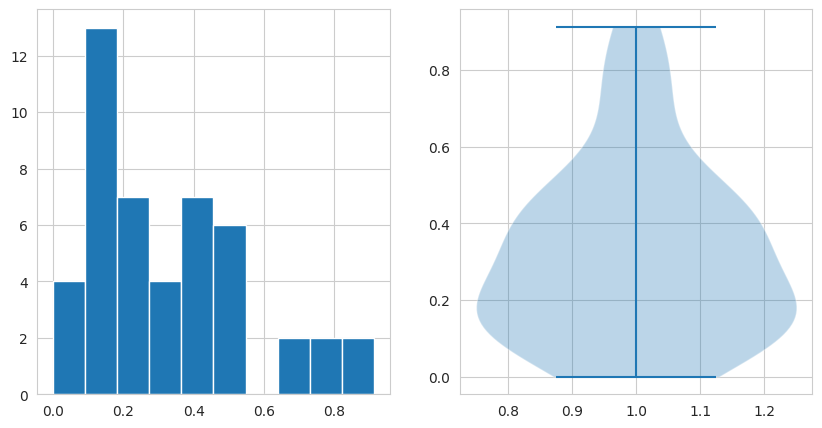

In [ ]:
# Plot conf_i
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(conf_misclassified)
ax[1].violinplot(conf_misclassified)
plt.show()

#### Part (iii)

In [ ]:
# Identify tokens (word_j) that contributed to the misclassification of documents
#@markdown Like we have done in the lab, we will get the words with the 10 highest magnitudes for each misclassified document to ease computational constraints
# Identify words that contributed to the misclassification

words = []


for i in misclassified_docs:
  shaps = shap_values[i,:]
  features = vectorizer.get_feature_names_out()
  positive_sentiment_weight = defaultdict(float)
  negative_sentiment_weight = defaultdict(float)

  for feat_i, val_i in zip(features,shaps):
    if val_i > 0:
      positive_sentiment_weight[feat_i] += val_i
    elif val_i < 0:
      negative_sentiment_weight[feat_i] += val_i

  if y_pred[i] == 0:
    weights=list(sorted(negative_sentiment_weight.items(), key=lambda item:item[1], reverse=True))
  else:
    weights=list(sorted(positive_sentiment_weight.items(), key=lambda item:item[1]))

  for feat_i, val_i in weights:
    if abs(val_i) > 0:
      words.append(feat_i)

words=list(np.unique(words)) # final set of words

In [ ]:
#@markdown **Strategy**: Count where these words are contributing in the *opposite* direction for each misclassified document
# Compute the number of documents (count_j) these words helped to misclassify
# Compute the sum of absolute SHAP values (weight_j) for each word_j

count_j = defaultdict(float)
weight_j = defaultdict(float)

features = vectorizer.get_feature_names_out()
idx = np.where(np.isin(features,words))[0]
features = features[idx]

for i in misclassified_docs:

  shaps = shap_values[i,idx]

  positive_sentiment_weight = defaultdict(float)
  negative_sentiment_weight = defaultdict(float)
  for feat_i, val_i in zip(features,shaps):
    if val_i > 0:
      positive_sentiment_weight[feat_i] += val_i
    elif val_i < 0:
      negative_sentiment_weight[feat_i] += val_i

  if y_pred[i] == 0:
    weights=list(sorted(negative_sentiment_weight.items(), key=lambda item:item[1], reverse=True))
  else:
    weights=list(sorted(positive_sentiment_weight.items(), key=lambda item:item[1]))

  for feat_j, val_j in weights:
    if abs(val_j) > 0:
      weight_j[feat_j] += abs(val_j)
      count_j[feat_j] += 1
    else:
      continue

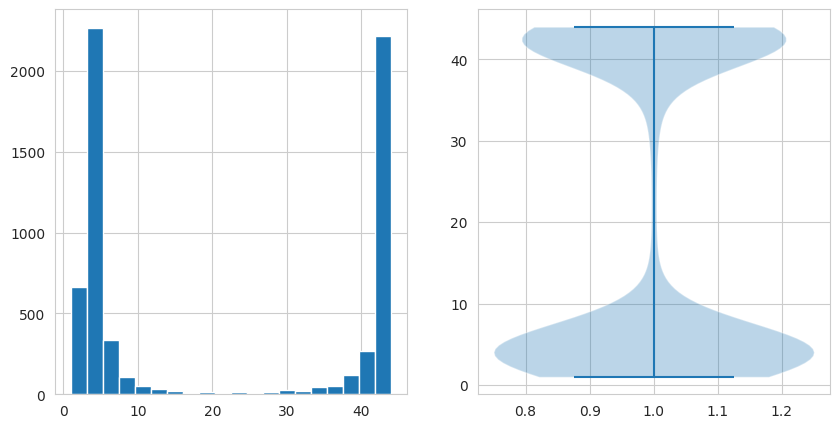

In [ ]:
# Plot the distribution of count_j and weight_j
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(list(count_j.values()),bins=20)
ax[1].violinplot(list(count_j.values()))
plt.show()

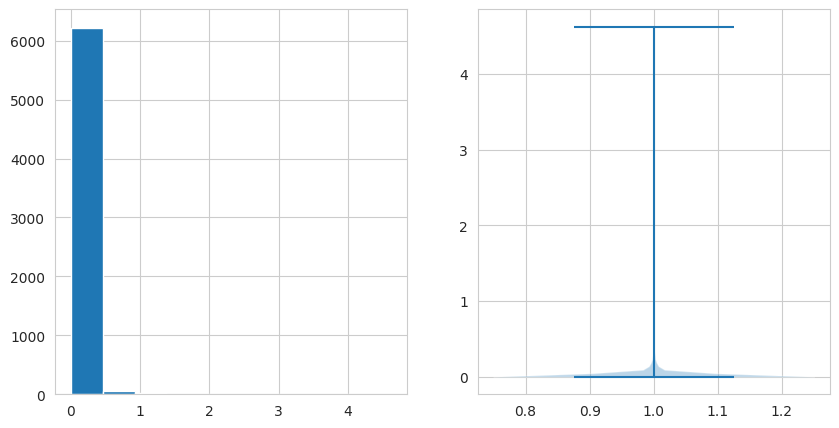

In [ ]:
# weight_j distribution raw data
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(list(weight_j.values()))
ax[1].violinplot(list(weight_j.values()))
plt.show()

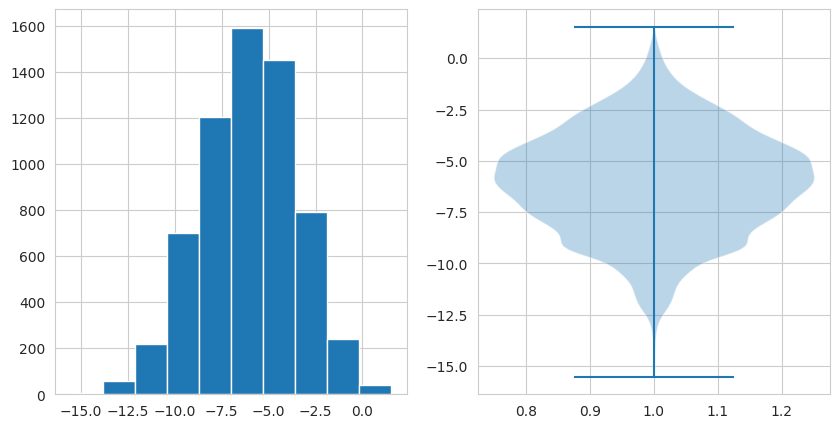

In [ ]:
# weight_j distribution log-transformed
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(np.log(list(weight_j.values())))
ax[1].violinplot(np.log(list(weight_j.values())))
plt.show()

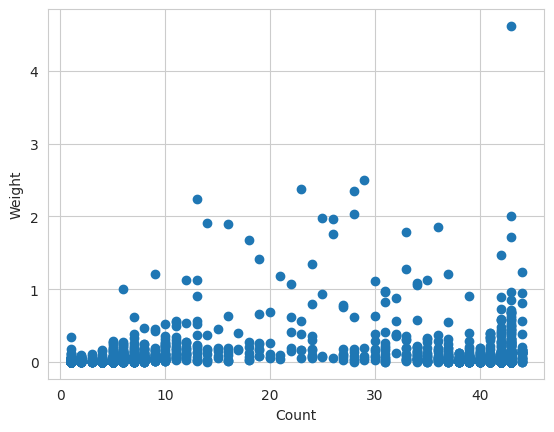

In [ ]:
# plotting weight against count
plt.scatter(x=count_j.values(), y=weight_j.values())
plt.xlabel('Count')
plt.ylabel('Weight')
plt.show()

In [ ]:
# compute magnitiude of word's shap value per appearance
weight_per_count = {i[0]: i[-1]/j[-1] for i,j in zip(sorted(weight_j.items()),sorted(count_j.items())) if i[0]==j[0]}

len(weight_per_count) # sanity check that weight and count number align for the specific word

6307

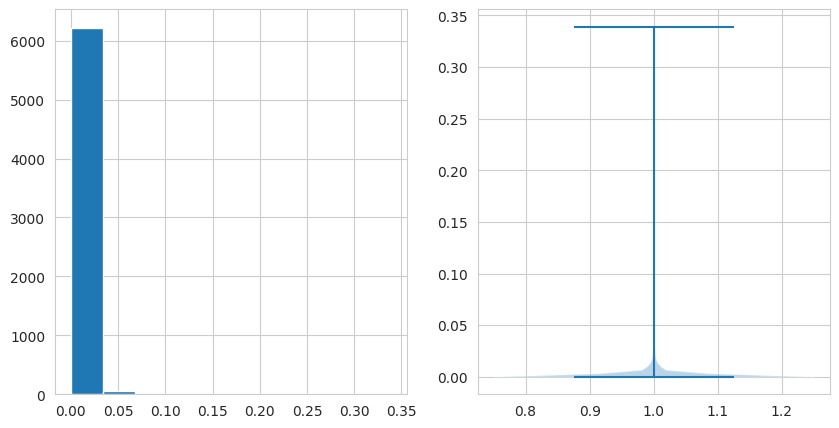

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(weight_per_count)
ax[1].violinplot(weight_per_count)
plt.show()

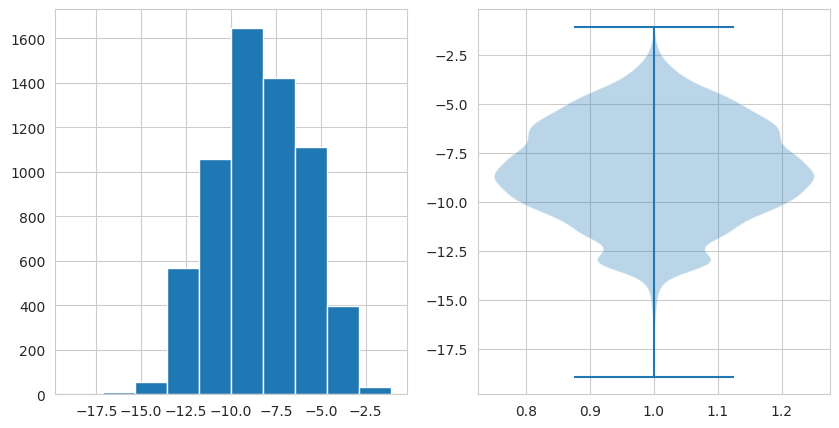

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(np.log(weight_per_count))
ax[1].violinplot(np.log(weight_per_count))
plt.show()

**Comments**:

### Part (D)

<ipython-input-32-25cbcfa74d99>:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test.toarray(), feature_names=vectorizer.get_feature_names_out())


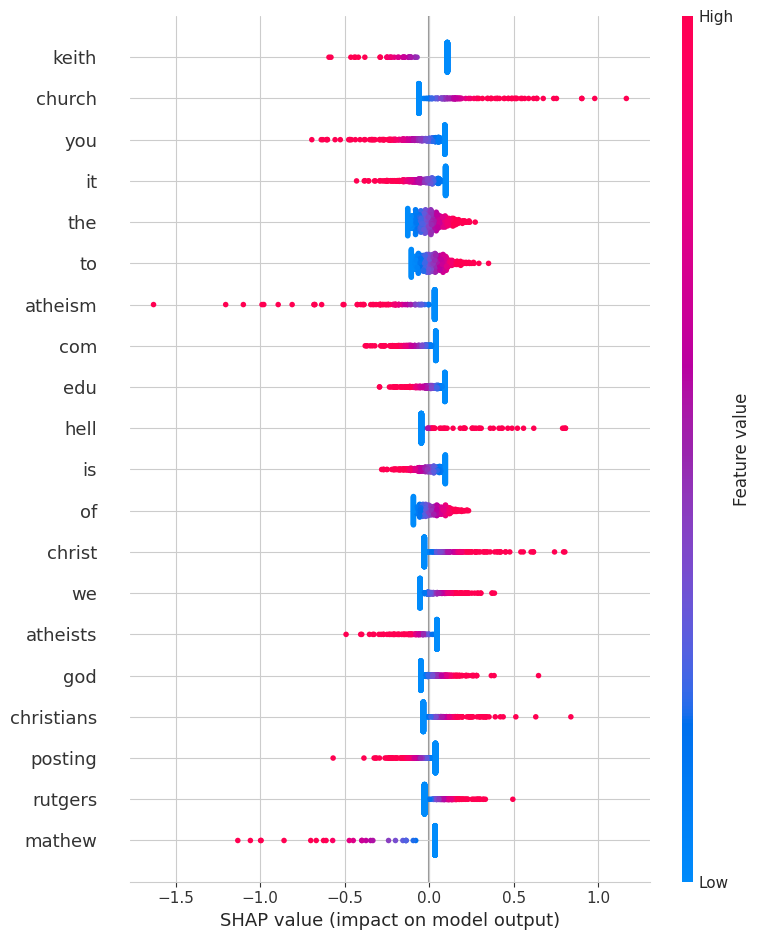

In [ ]:
# SHAP summary plot to identify words that contribute most to predictions in general
shap.summary_plot(shap_values, X_test.toarray(), feature_names=vectorizer.get_feature_names_out())

In [ ]:
# Compute mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Get feature importance order (descending)
importance_order = np.argsort(mean_abs_shap)[::-1]

# Get ordered feature names
ordered_feature_names = vectorizer.get_feature_names_out()[importance_order][:21]
print(ordered_feature_names)

['keith' 'church' 'you' 'it' 'the' 'to' 'atheism' 'com' 'edu' 'hell' 'is'
 'of' 'christ' 'we' 'atheists' 'god' 'christians' 'posting' 'rutgers'
 'mathew' 'nntp']


In [ ]:
# compute interquartile range to address outliers in data
# the lower outlier threshold for both statistics are negative, which are not possible with the given data
interquartilerange_weight=np.quantile(list(weight_j.values()),0.75)-np.quantile(list(weight_j.values()),0.25)
upper_weight = np.quantile(list(weight_j.values()),0.75) + 1.5*interquartilerange_weight
lower_weight = np.quantile(list(weight_j.values()),0.25) - 1.5*interquartilerange_weight

interquartilerange_weightcount=np.quantile(list(weight_per_count.values()),0.75)-np.quantile(list(weight_per_count.values()),0.25)
upper_weightcount = np.quantile(list(weight_per_count.values()),0.75) + 1.5*interquartilerange_weightcount
lower_weightcount = np.quantile(list(weight_per_count.values()),0.25) - 1.5*interquartilerange_weightcount

In [ ]:
# Implement a strategy for feature selection
#@markdown **Feature Selection Strategy:** Option 1-Remove words that appear most frequently. Option 2-Remove words that have the highest weight contributed per appearance. Option 3-Remove words with the highest overall weight (more brute-force). In the case of option 3, we will consider removing outliers, which are words beyond the bounds of a box plot.

# Option 1
filter_words1 = [i for i,j in count_j.items() if j >= 40]
filter_words1 = list(set(filter_words1) - set(ordered_feature_names))
print("Number of Words to Drop (Option 1):", len(filter_words1))

# Option 2
weight_per_count = [i/j for i,j in zip()]
filter_words2 = [i for i,j in weight_j.items() if j >= upper_weightcount]
filter_words2 = list(set(filter_words2) - set(ordered_feature_names))
print("Number of Words to Drop (Option 2):", len(filter_words2))

# Option 3
filter_words3 = [i for i,j in weight_j.items() if j >= upper_weight]
filter_words3 = list(set(filter_words3) - set(ordered_feature_names))
print("Number of Words to Drop (Option 3):", len(filter_words3))


Number of Words to Drop (Option 1): 2486
Number of Words to Drop (Option 2): 2762
Number of Words to Drop (Option 3): 947


https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
# retrain model with feature selection
# Initialize & fit tf-idf vectorizer
filtered_vectorizer = TfidfVectorizer(stop_words=list(filter_words1))
filtered_vectorizer2 = TfidfVectorizer(stop_words=list(filter_words2))
filtered_vectorizer3 = TfidfVectorizer(stop_words=list(filter_words3))

X_train_filter = filtered_vectorizer.fit_transform(newsgroups_train.data)
X_test_filter  = filtered_vectorizer.transform(newsgroups_test.data)

X_train_filter2 = filtered_vectorizer2.fit_transform(newsgroups_train.data)
X_test_filter2  = filtered_vectorizer2.transform(newsgroups_test.data)

X_train_filter3 = filtered_vectorizer3.fit_transform(newsgroups_train.data)
X_test_filter3  = filtered_vectorizer3.transform(newsgroups_test.data)

In [ ]:
# Retrain model
# Train & fit the classifier
model_filter = SGDClassifier(loss="log_loss")
model_filter.fit(X_train_filter, y_train)

model_filter2 = SGDClassifier(loss="log_loss")
model_filter2.fit(X_train_filter2, y_train)

model_filter3 = SGDClassifier(loss="log_loss")
model_filter3.fit(X_train_filter3, y_train)

SGDClassifier(loss='log_loss')

In [ ]:
accuracy_model1 = []
accuracy_model2 = []
accuracy_model3 = []

for i in range(10):
  model_filter = SGDClassifier(loss="log_loss")
  model_filter.fit(X_train_filter, y_train)

  model_filter2 = SGDClassifier(loss="log_loss")
  model_filter2.fit(X_train_filter2, y_train)

  model_filter3 = SGDClassifier(loss="log_loss")
  model_filter3.fit(X_train_filter3, y_train)

  accuracy_model1.append(sklearn.metrics.accuracy_score(model_filter.predict(X_test_filter), y_test))
  accuracy_model2.append(sklearn.metrics.accuracy_score(model_filter2.predict(X_test_filter2), y_test))
  accuracy_model3.append(sklearn.metrics.accuracy_score(model_filter3.predict(X_test_filter3), y_test))

In [ ]:
print(f"Option 1 Model Accuracy: {np.mean(accuracy_model1):.4f}")
print(f"Option 2 Model Accuracy: {np.mean(accuracy_filter2):.4f}")
print(f"Option 3 Model Accuracy: {np.mean(accuracy_filter3):.4f}")

Option 1 ModelAccuracy: 0.9484
Option 2 ModelAccuracy: 0.9400
Option 3 ModelAccuracy: 0.9582


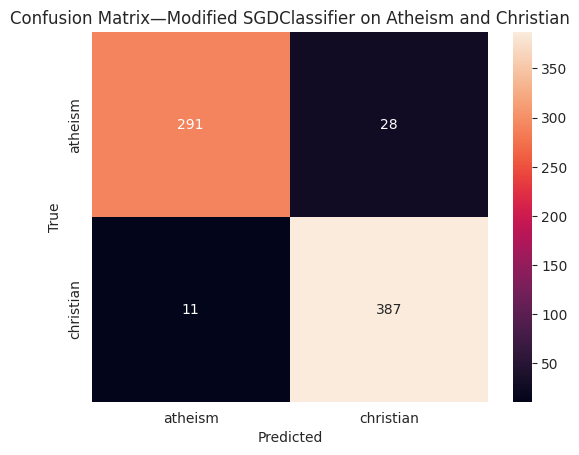

In [ ]:
# Confusion
y_pred_filter = model_filter3.predict(X_test_filter3)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred_filter)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix—Modified SGDClassifier on Atheism and Christian')
plt.show()

In [ ]:
# Identify at least one example that was misclassified before feature selection and that is classified correctly after feature selection
y_pred_filter = model_filter3.predict(X_test_filter3)
y_pred_filter[misclassified_docs]
y_pred[misclassified_docs]
corrected = {i: (1 if j==k else 0) for i,j,k in zip(misclassified_docs,y_pred_filter[misclassified_docs],y_test[misclassified_docs])}
corrected.items()

dict_items([(20, 1), (38, 1), (54, 0), (62, 0), (94, 0), (99, 1), (107, 0), (109, 1), (123, 1), (126, 1), (134, 1), (156, 0), (197, 1), (216, 1), (217, 1), (245, 1), (271, 1), (335, 1), (366, 1), (377, 1), (399, 1), (406, 0), (413, 0), (419, 1), (438, 1), (447, 1), (461, 1), (469, 1), (473, 1), (558, 1), (568, 0), (591, 1), (605, 0), (607, 1), (610, 0), (615, 1), (620, 0), (623, 0), (641, 0), (658, 1), (668, 1), (677, 1), (679, 0), (683, 1), (685, 1), (694, 0), (703, 1)])

In [ ]:
y_pred_filter[99]

np.int64(0)

In [ ]:
y_pred[99]

np.int64(1)

In [ ]:
y_test[99]

np.int64(0)

Compare SHAP explanation for one document

In [ ]:
explainer_filter = shap.LinearExplainer(model_filter3, X_train_filter3, feature_perturbation="interventional")
shap_values_filter = explainer_filter.shap_values(X_test_filter3)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [ ]:
shap.initjs()
i=94
print("Christian" if y_test[i] else "Atheist", "Text")
print(newsgroups_test.data[i])
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test[i,:].toarray()[0],
                    feature_names=vectorizer.get_feature_names_out())

Atheist Text
From: bobbe@vice (Robert Beauchaine;6086;59-323;LP=A;YAyG)
Subject: More Best of A.A
Lines: 164



			RAPTURE - OCTOBER 28, 1992

		WHAT TO DO IN CASE YOU MISS THE RAPTURE

I. STAY CALM AND DO NOT PANIC

	Your natural reaction once you realize what has just occurred is to
panic.  But to do so is absolutely useless now.  If you had wanted to get right
with God before the rapture, you could have, but you chose to wait.  Now your 
only chance is to stay on this earth and to endure to the end of the 
Tribulation.  "But he that shall endure unto the end, the same shall be 
saved." - Matthew 24:13

II. REALIZE YOU ARE NOW LIVING DURING THE GREAT TRIBULATION

	The Great Tribulation is a seven year period starting from the time of
the rapture until Christ's second coming.  Also know as "the time of Jacob's
(Israel's) trouble" (Jere 30:7) and "Daniel's Seventieth Week" (Dan 9), this 
period will be unparalleled in trouble and horror.

III. GATHER AS MANY BIBLES AS YOU CAN AND HIDE 

In [ ]:
shap.initjs()
i=94
print("Christian" if y_test[i] else "Atheist", "Text")
print(newsgroups_test.data[i])
shap.force_plot(explainer_filter.expected_value, shap_values_filter[i,:], X_test_filter3[i,:].toarray()[0],
                    feature_names=filtered_vectorizer3.get_feature_names_out())

Atheist Text
From: bobbe@vice (Robert Beauchaine;6086;59-323;LP=A;YAyG)
Subject: More Best of A.A
Lines: 164



			RAPTURE - OCTOBER 28, 1992

		WHAT TO DO IN CASE YOU MISS THE RAPTURE

I. STAY CALM AND DO NOT PANIC

	Your natural reaction once you realize what has just occurred is to
panic.  But to do so is absolutely useless now.  If you had wanted to get right
with God before the rapture, you could have, but you chose to wait.  Now your 
only chance is to stay on this earth and to endure to the end of the 
Tribulation.  "But he that shall endure unto the end, the same shall be 
saved." - Matthew 24:13

II. REALIZE YOU ARE NOW LIVING DURING THE GREAT TRIBULATION

	The Great Tribulation is a seven year period starting from the time of
the rapture until Christ's second coming.  Also know as "the time of Jacob's
(Israel's) trouble" (Jere 30:7) and "Daniel's Seventieth Week" (Dan 9), this 
period will be unparalleled in trouble and horror.

III. GATHER AS MANY BIBLES AS YOU CAN AND HIDE 

In [ ]:
idx = 94
vals = shap_values[idx,:]
positive_sentiment_weight = defaultdict(float)
negative_sentiment_weight = defaultdict(float)
feats = vectorizer.get_feature_names_out()

for feat_i, val_i in zip(feats, vals):
  if val_i > 0:
    positive_sentiment_weight[feat_i] += val_i
  elif val_i < 0:
    negative_sentiment_weight[feat_i] += val_i

In [ ]:
import operator
list(sorted(positive_sentiment_weight.items(), key=operator.itemgetter(1), reverse=True))[:10]

[('the', np.float64(0.2042364033382592)),
 ('christ', np.float64(0.19008632098226874)),
 ('and', np.float64(0.17177862202973238)),
 ('will', np.float64(0.16292536173562885)),
 ('his', np.float64(0.15224404413661938)),
 ('keith', np.float64(0.10745287392647032)),
 ('of', np.float64(0.09368954517447603)),
 ('edu', np.float64(0.09277115765887758)),
 ('to', np.float64(0.09188845191716095)),
 ('may', np.float64(0.08409696872474358))]

In [ ]:
list(sorted(negative_sentiment_weight.items(), key=operator.itemgetter(1)))[:10]

[('you', np.float64(-0.28910131018944063)),
 ('or', np.float64(-0.14054354749050108)),
 ('church', np.float64(-0.06161387740994388)),
 ('hell', np.float64(-0.04649646481405389)),
 ('matthew', np.float64(-0.04290404471030598)),
 ('we', np.float64(-0.04172838056550549)),
 ('take', np.float64(-0.03893856765542003)),
 ('bobbe', np.float64(-0.03373362285133432)),
 ('beauchaine', np.float64(-0.03356182233707433)),
 ('vice', np.float64(-0.0324695897957313))]

In [ ]:
idx = 94
vals = shap_values_filter[idx,:]
positive_sentiment_weight = defaultdict(float)
negative_sentiment_weight = defaultdict(float)
feats = filtered_vectorizer3.get_feature_names_out()

for feat_i, val_i in zip(feats, vals):
  if val_i > 0:
    positive_sentiment_weight[feat_i] += val_i
  elif val_i < 0:
    negative_sentiment_weight[feat_i] += val_i

In [ ]:
list(sorted(positive_sentiment_weight.items(), key=operator.itemgetter(1), reverse=True))[:10]

[('edu', np.float64(0.43453462083695715)),
 ('christ', np.float64(0.3660961313474989)),
 ('keith', np.float64(0.25726986994533135)),
 ('of', np.float64(0.1484575606394776)),
 ('to', np.float64(0.1359788098151718)),
 ('com', np.float64(0.1074230761856034)),
 ('atheists', np.float64(0.09356025379083006)),
 ('posting', np.float64(0.07722227563444735)),
 ('nntp', np.float64(0.07004474582311536)),
 ('mathew', np.float64(0.06841709030631228))]

In [ ]:
list(sorted(negative_sentiment_weight.items(), key=operator.itemgetter(1)))[:10]

[('you', np.float64(-0.4502207159793753)),
 ('church', np.float64(-0.0849360369002127)),
 ('we', np.float64(-0.07529167567309784)),
 ('be', np.float64(-0.06895659773338578)),
 ('the', np.float64(-0.06472806691132918)),
 ('rutgers', np.float64(-0.051986702798296196)),
 ('killed', np.float64(-0.04805352869672661)),
 ('hell', np.float64(-0.04486884572043197)),
 ('sic', np.float64(-0.04382369893158035)),
 ('bibles', np.float64(-0.04352225606767796))]